In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

/home/max/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
#调用reduce_sum(arg1, arg2)时，参数arg1即为要求和的数据，arg2有两个取值分别为0和1，通常用reduction_indices=[0]或reduction_indices=[1]来传递参数。从上图可以看出，当arg2 = 0时，是纵向对矩阵求和，原来矩阵有几列就得到几个值；相似地，当arg2 = 1时，是横向对矩阵求和；当省略arg2参数时，默认对矩阵所有元素进行求和。
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [9]:
#显存
config = tf.ConfigProto()

config.gpu_options.allow_growth = True

#config.gpu_options.per_process_gpu_memory_fraction = 0.4

Epoch: 0050 cost= 0.076999456 W= 0.24816342 b= 0.81175494
Epoch: 0100 cost= 0.076998569 W= 0.24824858 b= 0.811142
Epoch: 0150 cost= 0.076997787 W= 0.24832861 b= 0.8105668
Epoch: 0200 cost= 0.076997086 W= 0.24840368 b= 0.8100265
Epoch: 0250 cost= 0.076996461 W= 0.24847464 b= 0.8095162
Epoch: 0300 cost= 0.076995879 W= 0.24854137 b= 0.8090364
Epoch: 0350 cost= 0.076995373 W= 0.24860367 b= 0.808588
Epoch: 0400 cost= 0.076994918 W= 0.24866286 b= 0.80816245
Epoch: 0450 cost= 0.076994531 W= 0.24871823 b= 0.8077636
Epoch: 0500 cost= 0.076994166 W= 0.24877058 b= 0.8073871
Epoch: 0550 cost= 0.076993845 W= 0.24881977 b= 0.8070329
Epoch: 0600 cost= 0.076993562 W= 0.248866 b= 0.80670094
Epoch: 0650 cost= 0.076993294 W= 0.24890935 b= 0.80638903
Epoch: 0700 cost= 0.076993048 W= 0.24895015 b= 0.80609494
Epoch: 0750 cost= 0.076992840 W= 0.24898846 b= 0.8058191
Epoch: 0800 cost= 0.076992661 W= 0.24902514 b= 0.8055554
Epoch: 0850 cost= 0.076992467 W= 0.24905938 b= 0.80530965
Epoch: 0900 cost= 0.076992340

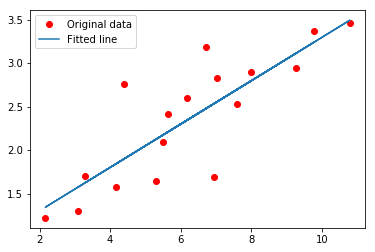

In [14]:
#Strat Training
with tf.Session(config = config) as sess:
    sess.run(init)
    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
         #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)
)
    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'
)
    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()